# Mel Spectrogram

A spectrogram is a visualization of the frequency spectrum of a signal, where the frequency spectrum of a signal is the frequency range that is contained by the signal. Mel spectrogram is basically a spectrogram that is represented in Mel scale.

The mel scale (after the word melody) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments.

Conversion from f Hz to m mel is given by 
$$ {\displaystyle m=2595\log _{10}\left(1+{\frac {f}{700}}\right)} $$

## Creating Mel Spectrogram with Python

We will use the library Librosa to create Mel Spectrograms of the urban-sounds. The dataset is publicly available [here](https://urbansounddataset.weebly.com/urbansound8k.html).  

In [7]:
# Import necessary libraries
import librosa
from librosa.feature import melspectrogram as mspect
import librosa.display

import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Librosa on action
y,sr= librosa.load("7061-6-0-0.wav") #load(path-to-sound-file)

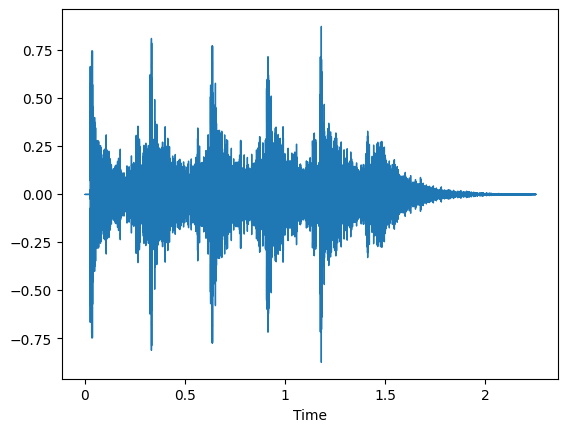

In [6]:
# Use librosa intrinsic AdaptiveWaveplot to visualize the sound file
fig, ax = plt.subplots()
librosa.display.waveshow(y, sr=sr, ax=ax)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

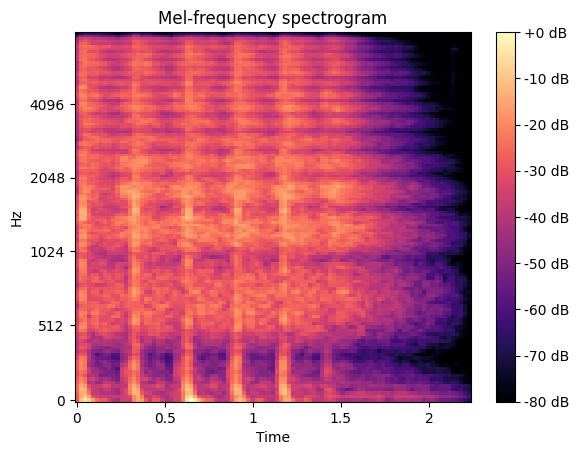

In [48]:
# Let us explore librosa.feature.melspectrogram
s_test = mspect(y = y, sr = sr)

# Now, apply some transformation to spectrogram that is stored in "s_test"  
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(s_test, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

(-0.5, 96.5, -0.5, 127.5)

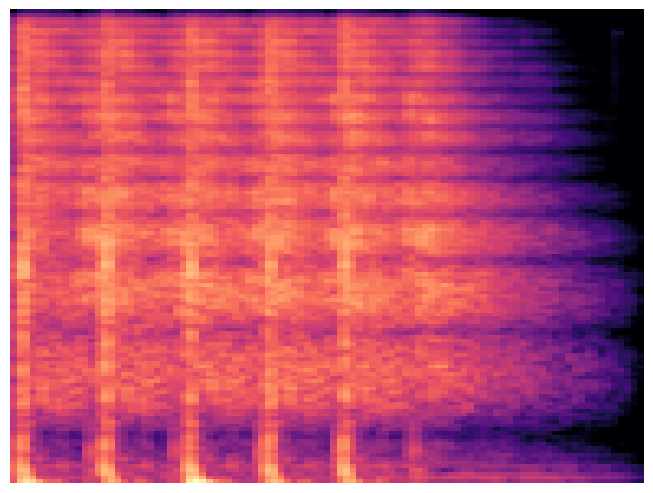

In [51]:
# We like to create spectrograms for the CNN model which will use pixels to learn. Thus, let's get rid of edges and obtain the spectrogram itself.
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(s_test, ref=np.max)
img = librosa.display.specshow(S_dB,ax=ax)

plt.tight_layout(pad = 0.05)
plt.axis('off')
plt.savefig("s_test.png",bbox_inches='tight',pad_inches = 0) #Save the figure with 0 padding.

# Creating Mel Spectrogram of Each Sound File

Following code reads and imports whole sound files in a given directory, creates Mel spectrograms for each file and save them to folder according to their Class ID. In order to determine a class ID, we used metadata file and match the class id with the filename. 

In [74]:
# Import required libraries
import librosa
from librosa.feature import melspectrogram as mspect
import librosa.display

import os
import matplotlib.pyplot as plt
import numpy as np

In [100]:
# I used UrbanSound8K.csv file that contains meta data in order to match the classID with the filename
import pandas as pd

metaDF = pd.read_csv(r"C:\Users\kemal\Desktop\UrbanSound8K\metadata\UrbanSound8K.csv")

In [86]:
# Split file name and extension and select filename as 100032-3-0-0
def name_splitter(sound_file):
    filename = str(sound_file).split('.')[0]
    return filename

In [106]:
# Use file name to match class and create path to final folders (0,1,2,3,4..,9) 
def target_path(sound_file):
    filename = name_splitter(sound_file)
    class_ID = int(metaDF.classID.loc[metaDF['slice_file_name'] == str(sound_file)])
    
    
    target = r"C:\Users\kemal\Desktop\UrbanSound8K\data"
    final_target = os.path.join(target,str(class_ID)) # Do NOT forget to convert class_ID to string! 

    return final_target #Path for spectrograms

In [118]:
# Test:
print(target_path("7061-6-0-0.wav"))

C:\Users\kemal\Desktop\UrbanSound8K\data\6


In [122]:
# This function create and save spectrograms using the functions defined above cells. 
def create_save_spectrogram(s_path, sound_file):

    filename = name_splitter(sound_file)
    path = target_path(sound_file)

    y, sr = librosa.load(s_path)
    y_spect = mspect(y = y, sr = sr)

    fig, ax = plt.subplots()
    plt.ioff()
    S_dB = librosa.power_to_db(y_spect, ref=np.max)
    img = librosa.display.specshow(S_dB,ax=ax)
    
    #Crop the edges and save
    plt.tight_layout(pad = 0.05)
    plt.axis('off')
    plt.savefig("%s\%s.png"%(path,filename),bbox_inches='tight',pad_inches = 0)
    
    print(f"Spectrogram of {filename} is saved to {path}.") #Just to test, printing in everyloop increases the run-time enormously!

In [109]:
# Test:
# Create_save_spectrogram("7061-6-0-0.wav")

In [ ]:
# Using for loop to run function create_save_spectrogram for every folder and image file
sounds_path = r"C:\Users\kemal\Desktop\UrbanSound8K\audio"

folders = os.listdir(sounds_path)

for folder in folders:
    files_path = os.path.join(sounds_path,folder)

    files = os.listdir(files_path)

    breaker = input("Do you want to continue? (Y/N):")

    if breaker == 'Y' or breaker == 'y':
        for file in files:
            s_path = os.path.join(files_path,file)
            # print(s_path) #Just to test, printing in everyloop increases the run-time enormously!
            create_save_spectrogram(s_path,file)
            
    else:
        break